[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thomasmanke/ABS/blob/main/Notebooks/MarkovChains/MC_001_MCSampling.ipynb)

# Markov Chain Sampling

## Background 

In the models discussed previously, all observations were sampled independently of each other, and from the same distribution (*iid*): 

$$X \propto N(\mu, \sigma^2)$$

In higher dimensional models $X$ can be a vector with correlations among its components, but different observations of this vector would still be independent of each other.

Let's relax this. Assume the next state will depend (**only**) on the current state. In the travel analogy: don't sample countries independently, but travel (sample) along some biased paths.

The future is only a function of the present (and some parameters):

$$x_{t+1} = f(x_t, \theta)$$

This is similar to **deterministic** physical laws, but with added stochasticity. 


A Markov Process generates a sequence (a Markov chain) of states: 
$X = (X_0, X_1, \ldots)$ where each $X_t$ is a random variable and


$$Pr(X_{t+1} | X_t, X_{t-1}, \ldots X_1) = Pr(X_{t+1} | X_t) $$


Markov Chain is a **memory-less** stochastic process: the present state encodes all the history.

In Statistics parlance: Given the Present, the Future is conditionally independent of the Past.
<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/MC_DeterministicStatistic.jpg",  width="1000">
</div>







## Some History 

<div>
   <img src="https://upload.wikimedia.org/wikipedia/commons/7/70/AAMarkov.jpg" align="right" width="200">
</div>

Andrey Markov (1856-1922)
- study processes which are not iid
- Law of Large Numbers does not depend on iid assumption
- 1st Markov model: words with 2 states (consonant, vowel)

## A travel story

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/MC_TravelStory.jpg",  width="600">
</div>


# Representations

## Encodings

In this course we will assume that possible values for states $X_t$ are *discrete*. There are different possible **encodings**: 
- {0,1,2,3}
- {A,B,C,D} or {A,C,G,T}
- {00, 01, 10, 11}
- ...

For computational convenience we often use integers, possibly with an added dictionary when necessary.

## The Markov chain

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/MC_MarkovChain.jpg",  width="1000">
</div>


## The State graph

An image says a thousand words:

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/MC_StateGraph.jpg" width="1000">
</div>





## The transition matrix

Matrices help for actual computation:

$$
P = \begin{bmatrix} 
0.8   &  0.2 \\ 
0.1   &  0.9 
\end{bmatrix} 
$$

## The Trellis graph

Example for 4 different states:
<div>
   <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Convolutional_code_trellis_diagram.svg/2880px-Convolutional_code_trellis_diagram.svg.png"  width="1000">
</div>

An observed sequence $X$ is a specific path (one of many possible) through the lattice diagram (shown in red).

## Check:

Are you comfortable to swap between the 4 representations? We'll use them a lot.

---

---

## Discussion
Suggest other examples of Markov chains.

- What are the observables and what are transitions ?
- How would you represent this system?
- Are there examples of sequences that **cannot** be described by simple transitions?

Inspirational link: https://en.wikipedia.org/wiki/Examples_of_Markov_chains

## Polls:


**Example 1:** drawing coloured balls from a mixed bag. Colour=random variable=state.
1. without replacement --> Markovian?
2. with replacement --> Markovian? 

**Example 2:** from physics/mechanics: Consider flying object at time t. What is the state of the object?
1. state=position --> Markovian?
2. state=position+velocity --> Markovian?

# Markov Chains with Python

### Define Transition Matrix

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
P = [[0.8, 0.2], [0.1, 0.9]]

**Question**: What type of data structure is P: List, Set, Tuple ?

In [3]:
#%%script echo Edit before executing
print('type of P   ',  type(P) )
print('length of P ', len(P) )

type of P    <class 'list'>
length of P  2


Let's convert $P$ into numpy array:

In [71]:
P = np.array(P)
print('dimensionality of P: ', P.ndim)
print('shape of P:          ', P.shape)

dimensionality of P:  2
shape of P:           (2, 2)


In [13]:
print(P.sum(axis=1) )

[1. 1.]


**Defensive Programming:** Check Transition Matrix $P$

In [17]:
  assert P.shape[0]==P.shape[1],         "P should be a squared matrix"
    # common convention is that first dimension is rows, second columns
  assert np.allclose( P.sum(axis=1), 1), "P should be a stochastic matrix"
    # allclose checks if the sums are close to one within numerical precision on a computer

[0.1 0.9]


**Task (10 min):**:

Chose a state $X$, then chose (probabilistically) the next state with probability given by the transition matrix $P$.

Hint1: use integer encoding of state variable

Hint2: use np.random.choice()

In [35]:
#%%script echo Edit before executing
np.random.seed(42)         # optional (for determinisitic reproducibility)
X0= 0
history=[X0]
for i in range(1,99):
    X1= np.random.choice(a=[0,1], p=P[history[-1]])
    history.append(X1)
print(history)

[0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### Generate Sequences




**Task 10 min**: Repeat the ideas above to generate a sequence of 100 observations from Markov Model $P$

In [37]:
#%%script echo Edit before executing
# hupsi already solved above
np.random.seed(42)
ns= P.shape[0]     # obtain number of states from P
X= 0      # pick initial state manually
L1 = [ X ]   # add X to sequence of states

# loop over 100 times
for t in range(100):
  X = np.random.choice(ns,p=P[X,:])  # pick next state from current state
  L1.append(X)         # append it to list

print(*L1, sep='')     # print sequence

00111110111011111111111111111100001111000000111111111111100000011111101110111100011100000111111111100


Congratulations! You have just generated your first Markov chain !

**Poll:** What happens if you comment out the first line? (Think first, then try)

---

---


**Task (10min):** 

We will need the sequence generation again. Turn it into a function.

Include the initial state $s$ and the maximal time $T$ as parameters with default values ($s=0, T=100$)

Test the function for the $P$ above

In [81]:
#%%script echo Edit before executing
def generate_sequence(P, s=0, T=100):
    states_amt = P.shape[0]
    if s>=states_amt:
        raise Exception('starting state not within probability matrix')
    else:
        assert P.shape[0]==P.shape[1],         "P should be a squared matrix"
        assert np.allclose( P.sum(axis=1), 1), "P should be a stochastic matrix"
    history = [ s ]
    for i in range(T+1):
        X1= np.random.choice(a=states_amt, p=P[history[-1]])
        history.append(X1)
    return(history)

In [73]:
X=generate_sequence(P)
print(*X, sep='')

011111111111111111110000001111101111111100111111111100000000000000111000000000000000111111011111111111


**Discussion:** The above example is very simplistic. Which changes would you suggest to make the function more robust?

<div class="alert alert-block alert-warning">

**Exercise (10 min)**:

Repeat the above for a Markov chain with 3 states and transition matrix (or some other choice)

$$P_3 = \begin{bmatrix}
0.8 & 0.1 & 0.1 \\
0.2 & 0.7 & 0.1 \\
0.1 & 0.2 & 0.7 
\end{bmatrix} $$
 </div>

0000000000002000222120012000002222111111221100000001011111111120000000000211211001111200200000000000212000000111222111111111112000001111122000000001112000011000111111111200112211111111120002212020000002111121111201112111121200002201101111111112200000000000000001200000000111102111220000212011200000211011100000000000000000011111112111111112111121110002200000000122200001121110000000000111222000011000001200001111000000111111211111211111110000000001111000000000000000111111112211220000001111111111100000012222211111111112221112000000000011200000000011111111112211200000211111212211110001200000000000211111120000000000011112111112200001111211112111111111210211111121110002211121112201101211222122011110011121111121211111000000000001001111122120011000000012022000000011220001100011210201100220000002121121222100000000000000111221111212121000011111211112212002121220000000221111122000000000001200000000020000000000000000220102000001111100000001111100000000001111111000001122221000121110001121201111200001

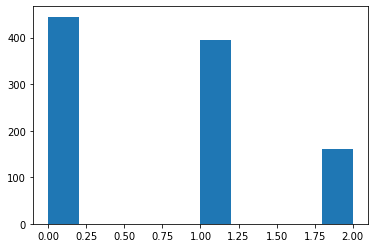

In [95]:
#%%script echo Edit before executing
P3 = np.array([[0.8, 0.15, 0.05],
               [0.1, 0.7, 0.2],
               [0.333, 0.333, 0.334]])

X = generate_sequence(P3, T=1000)
print(*X, sep='')
H = plt.hist(X)

## An animation

There is a beautiful animation & visualization, but please be aware that they may not render well on all systems.

- Visualization: https://setosa.io/markov/index.html
- Explanation: https://setosa.io/ev/markov-chains



## Coin throws

Throwing a *biased* coin is usually modelled as a Bernoulli process with success probability $p$ - i.e. the probability of obtaining heads.
$$
Pr(X=Heads) = p
$$

For an *unbiased* coin: $p=0.5$.

However, this can also be formulated as a Markov Process.
Let's encode the two possible states as (heads=0) and (tails=1) for numerical convenience - see figure.

**Task (10 min):**

Write down the corresponding transition matrix $P$ for a biased coin and simulate the coin throwing experiment - e.g. 50 throws for your favorite $p$.

In [96]:
#%%script echo Edit before executing
p = 0.49
P = np.array([ [p, 1-p],
               [p, 1-p] # it is not [1-p, p] because then it would be more likely to come up with the same side it currently is
             ]
            )
X = generate_sequence(P, T=50)
print(*X, sep='')

0111000100001011011100011100101000000000101111011100


# References

- https://brilliant.org/wiki/markov-chains/

- John Tsitsiklis (MIT, Prob. Systems): https://www.youtube.com/watch?v=IkbkEtOOC1Y
- Joseph Blitzstein (Harvard, Stats110): https://www.youtube.com/watch?v=8AJPs3gvNlY
